In [2]:
import requests
from PIL import Image
from io import BytesIO

In [3]:

def downloade_img(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

In [13]:
im1 = downloade_img('https://images.unsplash.com/photo-1531297484001-80022131f5a1?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=820&q=80')
im1.save('image1.png')

In [5]:
im2 = Image.open(r"C:\Users\dbaam\OneDrive\Desktop\IMG20220221131048-min.jpg")      # r is for raw string 
im2.size

(2126, 4608)

In [6]:
im2.show()

In [7]:
im2.info

{'jfif': 257,
 'jfif_version': (1, 1),
 'jfif_unit': 0,
 'jfif_density': (1, 1),
 'progressive': 1,
 'progression': 1}

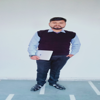

In [8]:
# resize image
im2.resize((100,100))

In [ ]:
im2.resize((3 * im2.width, 3* im2.height))

In [10]:
from email.mime import image


im2.resize((im2.width//3, im2.height//3)).save('image3.png')

In [11]:
from PIL import ImageDraw, ImageFont

In [15]:
im1.show()

In [ ]:
im1.rotate(90)

In [21]:
im1.rotate(30, expand=True, fillcolor='white').save('laptop1.png')

In [ ]:
# Image Flip
im1.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
# if u are getting error the use this
# im1.transpose(Image.FLIP_LEFT_RIGH)


In [ ]:
im1.transpose(Image.Transpose.FLIP_TOP_BOTTOM)

In [26]:
sky = downloade_img('https://thumbs.dreamstime.com/b/blue-sky-clouds-natural-background-92316401.jpg')
sky.save('sky.jpg')

In [27]:
mauntain = downloade_img('https://media.gettyimages.com/photos/panorama-of-beautiful-mount-ama-dablam-in-himalayas-nepal-picture-id1164550537?s=612x612')
mauntain.save('mountain.jpg')

In [28]:
print("sky image resolution: ", sky.size)
print('sky format: ', sky.format)
print("mauntain image resolution: ", mauntain.size)
print('mauntain format: ', mauntain.format)

sky image resolution:  (800, 533)
sky format:  JPEG
mauntain image resolution:  (612, 408)
mauntain format:  JPEG


In [48]:
def blend_image(image_1, image_2, mode='RGBA', size=(100,100), alpha=0.5):
    image_1 = image_1.resize(size)
    image_2 = image_2.resize(size)
    image_1 = image_1.convert(mode)
    image_1 = image_2.convert(mode)
    blended_image = Image.blend(image_1, image_2, alpha)
    return blended_image  
    

In [49]:
blend_image(im2, im1, alpha=0.3, size=(1000,1000)).show()

In [56]:
icon = Image.open(r"E:\library.jpg")

In [57]:
icon.size

(275, 183)

In [62]:
im2.size

(2126, 4608)

In [36]:
im1 = im1.convert('RGBA')
im1.paste(icon,(0,0))
im1.show()

In [37]:
im1.paste(icon, (200,200))
im1.show()

In [63]:
def add_watermark(image, watermark, style=None, pos=(0,0)):
    image = image.convert('RGBA')                 # convert image to RGBA
    watermark = watermark.convert('RGBA')         # convert watermark to RGBA
    if style == 'tile':
        for x in range(0, image.width,watermark.width):
            for y in range(0, image.height, watermark.height):
                image.paste(watermark, (x,y), mask=watermark)
    elif style is None:
        image.paste(watermark, pos, mask=watermark)
    return image

In [64]:
add_watermark(im2, icon, pos=(10,10)).show()

In [54]:
from PIL import ImageFilter

In [ ]:
filters = [
    ImageFilter.BLUR,
    ImageFilter.CONTOUR,
    ImageFilter.DETAIL,
    ImageFilter.EDGE_ENHANCE,
    ImageFilter.EMBOSS,
    ImageFilter.FIND_EDGES,
    ImageFilter.SMOOTH,
    ImageFilter.MaxFilter(7),
    ImageFilter.MinFilter(7),
    ImageFilter.MedianFilter(3),
    ImageFilter.ModeFilter(3),
    ImageFilter.GaussianBlur(30),
    ImageFilter.RankFilter(3, 3), 
]
for filter in filters:
    mauntain.filter(filter).show()